# Estudio de evolución temporal de aftershocks

Descripción del proyecto

## 1. Descargar los datos

link de google drive

In [ ]:
#https://drive.google.com/file/d/1Vh6umk8AlTCU5XEdpiRRjpy8N9gl3li0/view?usp=share_link

Para bajarlo se usa un link modificado

In [ ]:
#!gdown https://drive.google.com/uc?id=1Vh6umk8AlTCU5XEdpiRRjpy8N9gl3li0

In [ ]:
Descomprimir el archivo

In [ ]:
#unzip SPUD_bundle_2023-03-28T14.29.00.zip 

## 2. Leer archivos

In [167]:
import numpy as np
import pandas as pd
#import fnmatch
import os
import glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

!mkdir figs_num_time
!mkdir figs_mag_time
!mkdir figs_depth_time
!mkdir figs_comb

mkdir: cannot create directory ‘figs_num_time’: File exists
mkdir: cannot create directory ‘figs_mag_time’: File exists
mkdir: cannot create directory ‘figs_depth_time’: File exists
mkdir: cannot create directory ‘figs_comb’: File exists


In [168]:
!rm SPUD_bundle_2023-03-28T14.29.00/After*/*copy.txt
dir_path="SPUD_bundle_2023-03-28T14.29.00"
list_files=[]
for file_dir in glob.glob(dir_path + "/**", recursive=True):
     if file_dir.endswith(".txt"):
         list_files.append(file_dir)

#print(list_files)

## 3. Limpiar archivos

In [103]:
for tx_file in list_files:
    agencies=[",us",",US",",GCMT",",guc",",NEIC",";NEIC",",ISC",",IDC",",EIDC",",CASC",",CADCG",",SJS",",SSNC",",MEX",",IBQ",",IGQ",",TRN",",TAC",",SSS",",INET",",UVC",",RSMAC",",SCB",",GUC",",NEIS",",LIM",",SNET",",SDD",",UNM",",SJA","JB"]
    mags=["|mb,","|MW,","|Mww,","|mww,","|MWR,","|md,","|,","|ML,","|MB,","|MWW,","|MS,","|Mwr,","|mbtmp,","|MD,","|mw,","|mL,","|MSZ,","|MWB,","|mb_Lg,","|mb1mx,"]
    with open(tx_file,'r') as data:
        plaintext=data.read()
    for sust in agencies:
        plaintext=plaintext.replace(sust,"")
    for sust in mags:
        plaintext=plaintext.replace(sust,"|")
    with open(tx_file[:-4]+"_copy.txt", 'w') as f:
        f.write(plaintext)

## 4. Crear data frame y hacer graficas N-t

222 NEAR COAST OF PERU 7 7 2001 7.6


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


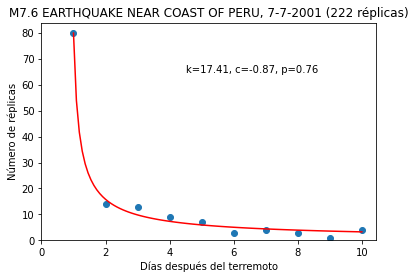

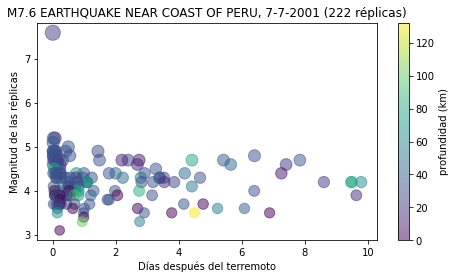

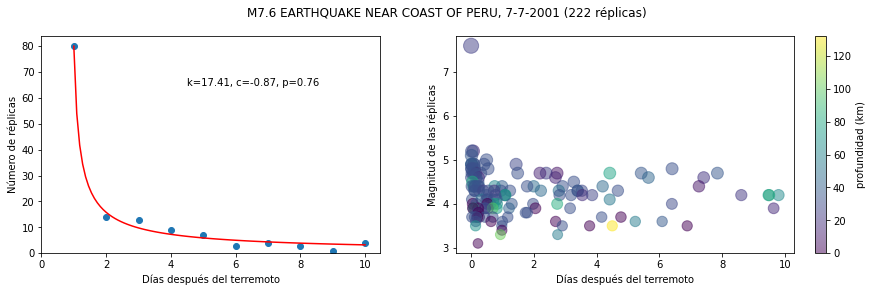

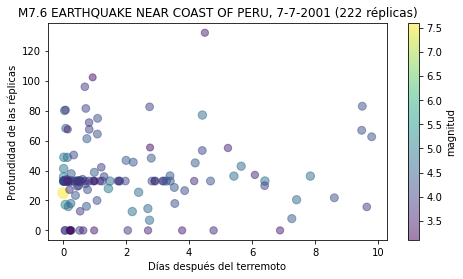

96 NEAR COAST OF CENTRAL CHILE 2 1 2011 7.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


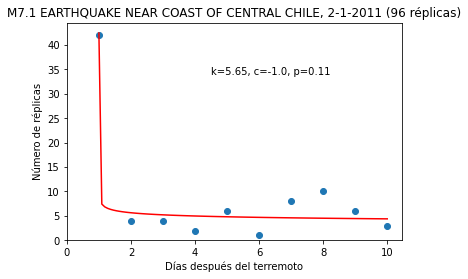

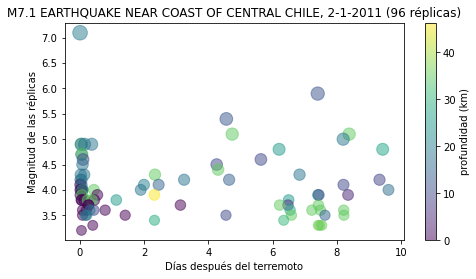

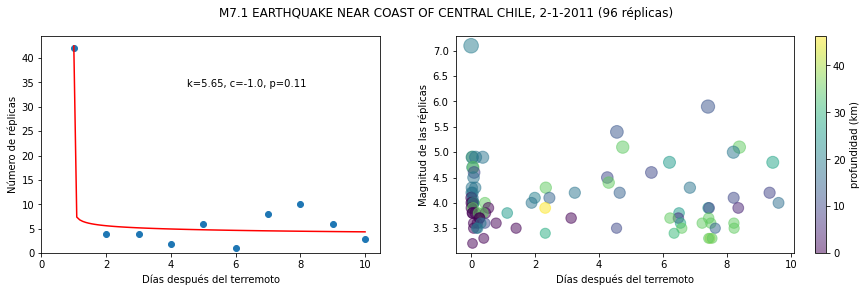

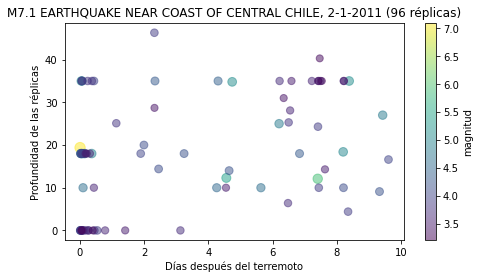

246 OFF COAST OF CENTRAL CHILE 16 9 2015 8.2


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


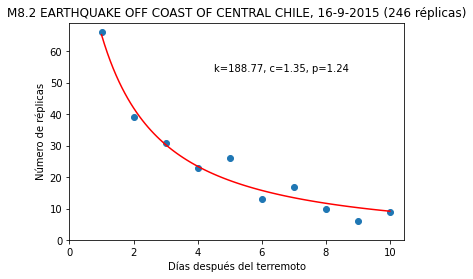

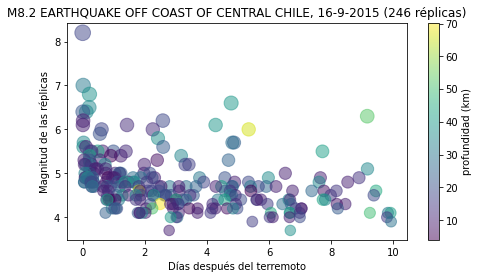

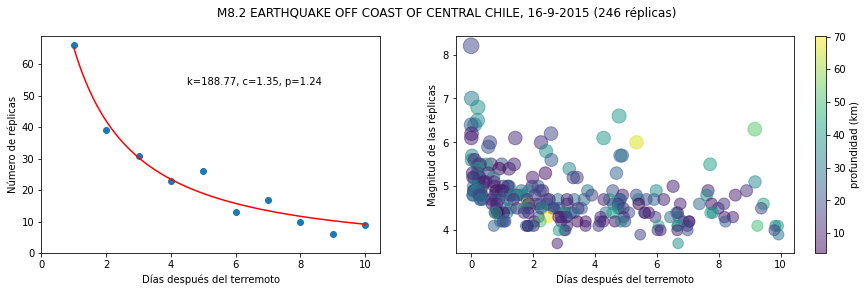

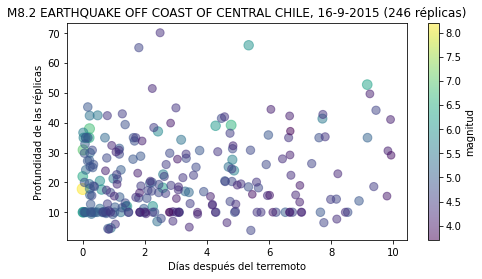

136 NORTHERN CHILE 13 6 2005 7.8


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


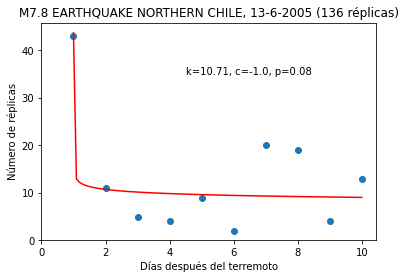

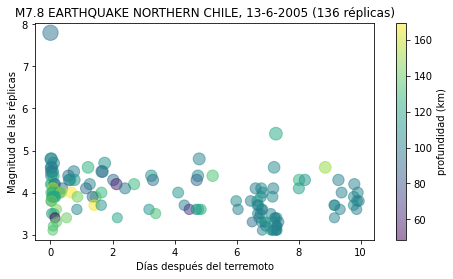

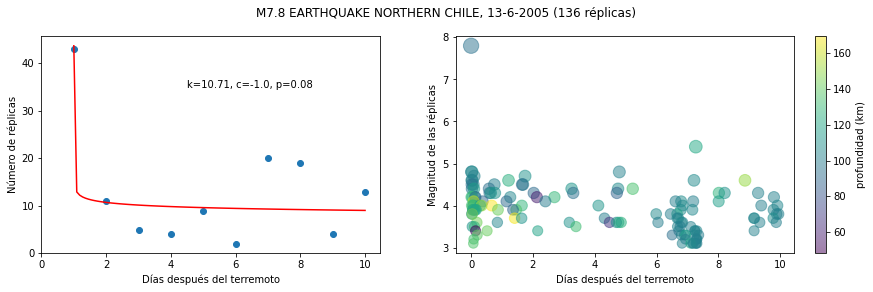

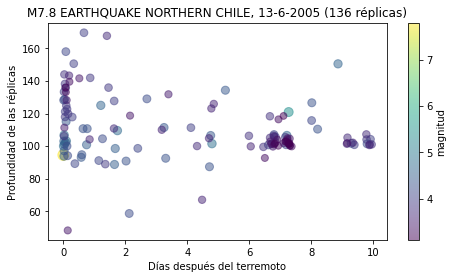

65 OFF COAST OF CENTRAL AMERICA 27 8 2012 7.3


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


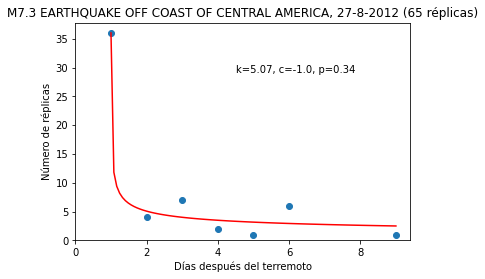

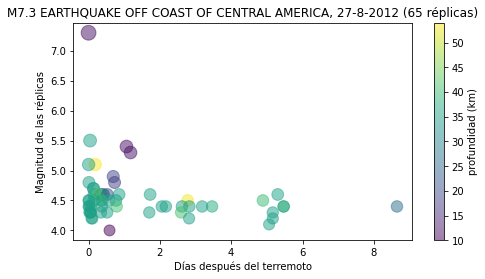

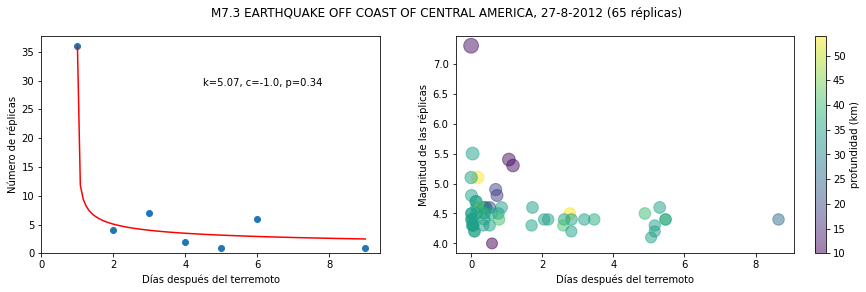

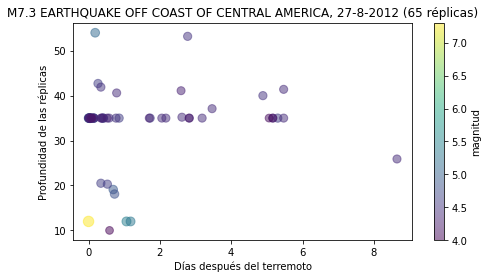

132 HAITI REGION 12 1 2010 7.0


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


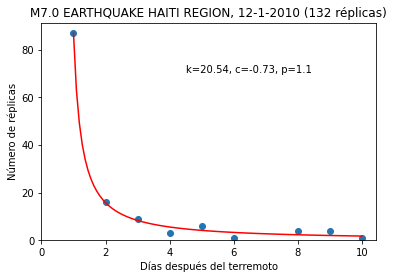

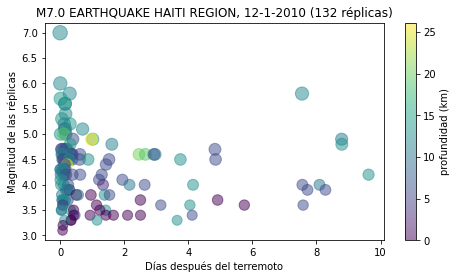

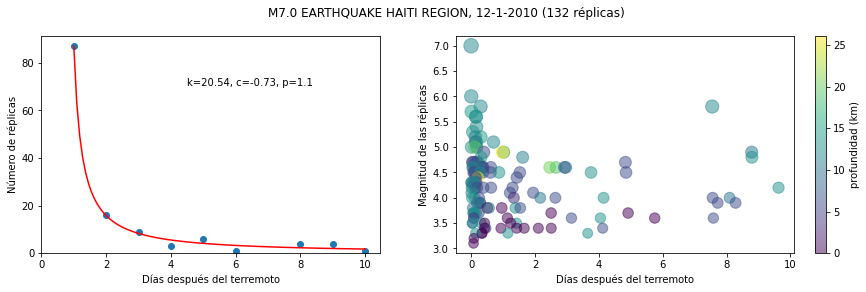

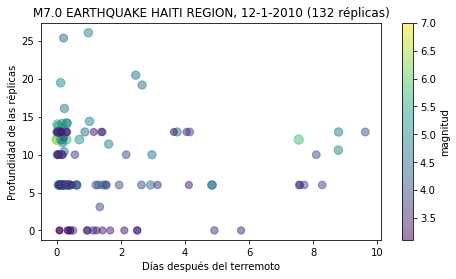

69 NORTHERN COLOMBIA 18 10 1992 7.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


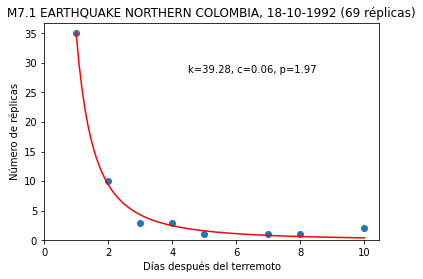

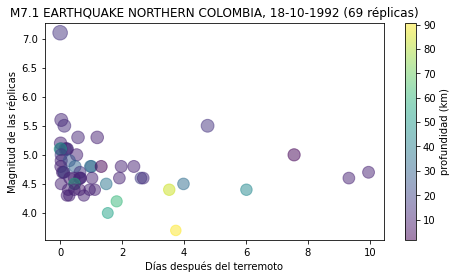

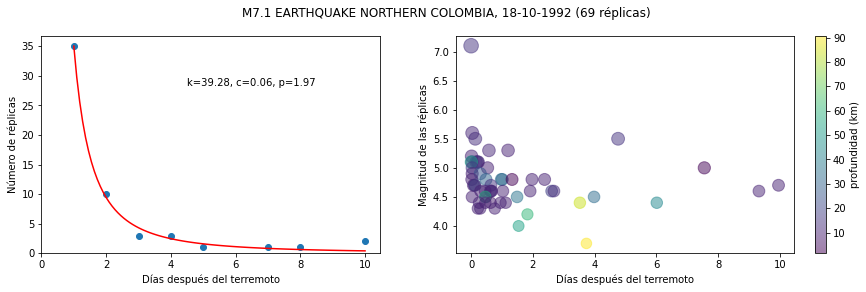

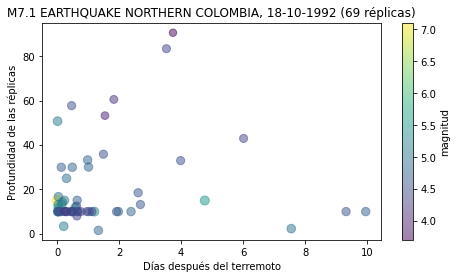

65 NORTH OF HONDURAS 28 5 2009 7.3


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


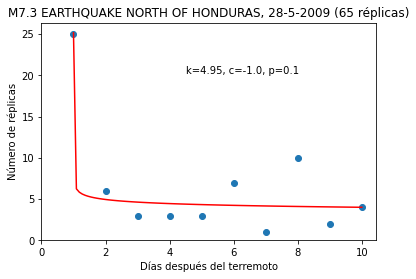

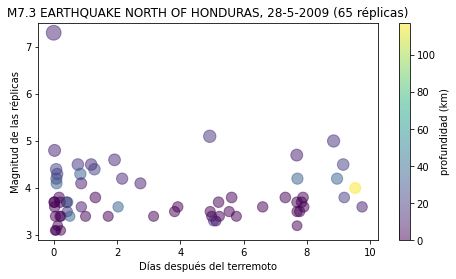

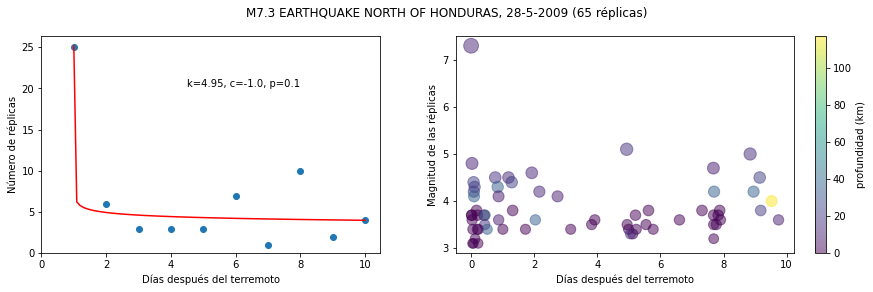

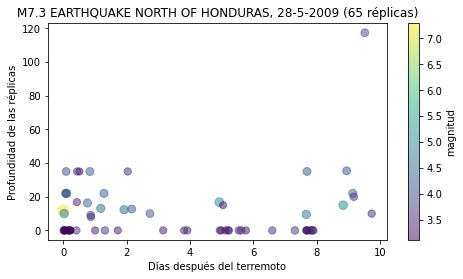

404 NEAR COAST OF NORTHERN CHILE 1 4 2014 8.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


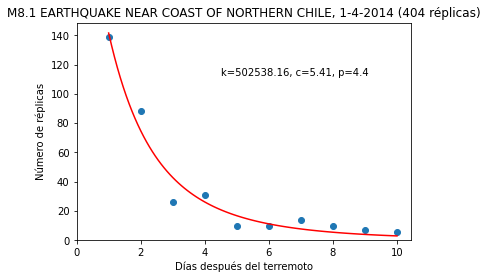

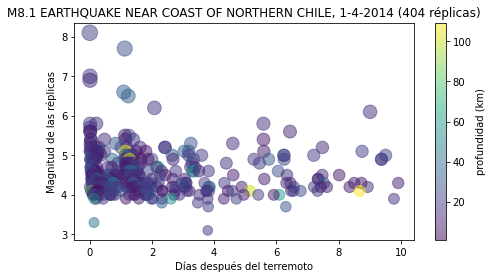

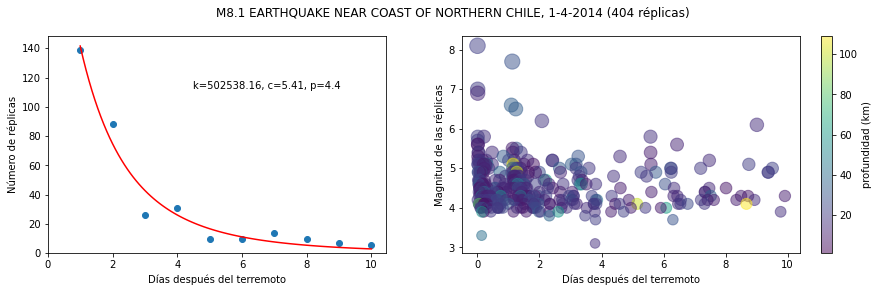

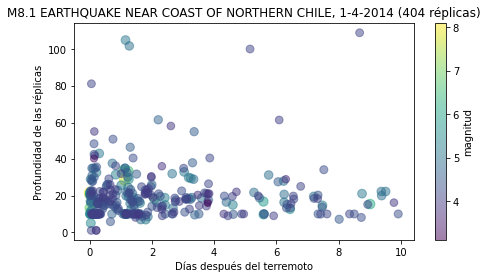

185 NEAR COAST OF OAXACA, MEXICO 8 9 2017 8.2


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


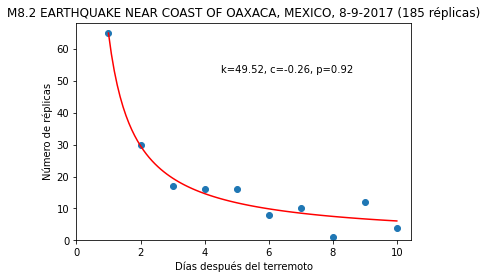

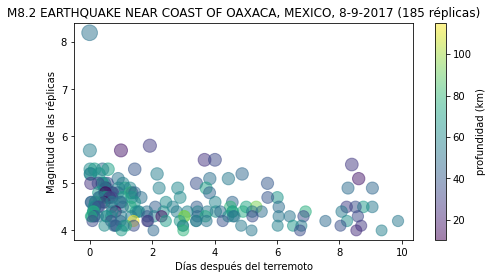

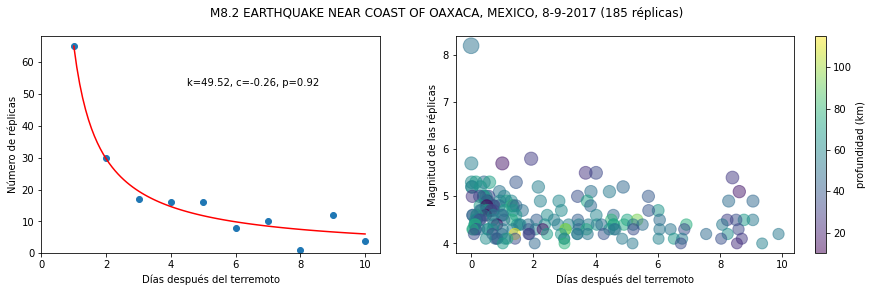

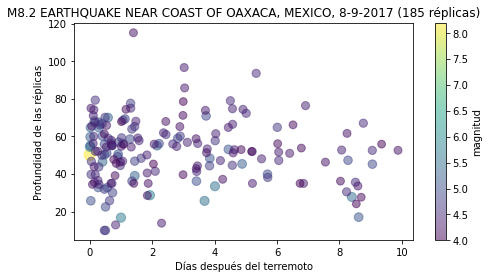

641 OFF COAST OF CENTRAL CHILE 27 2 2010 8.8


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


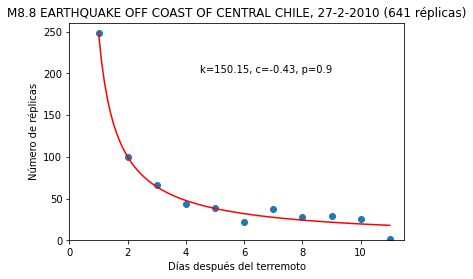

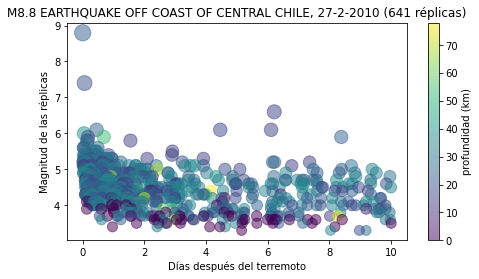

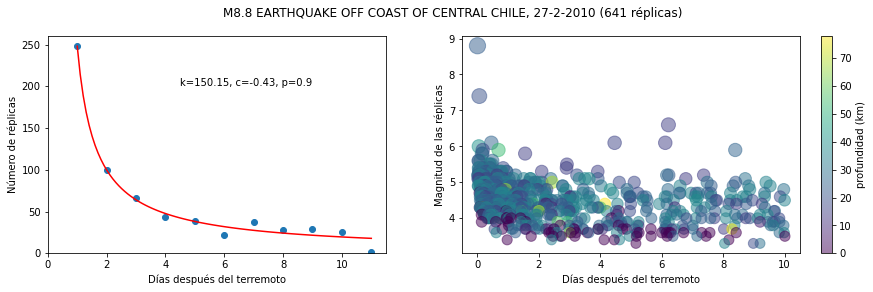

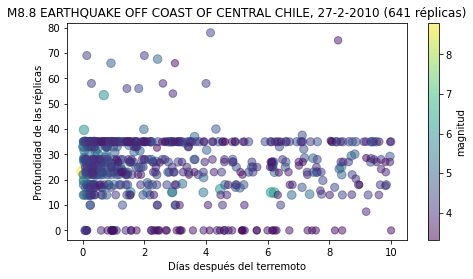

116 NEAR COAST OF GUERRERO, MEXICO 20 3 2012 7.5


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


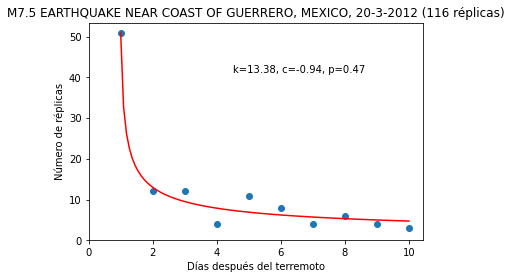

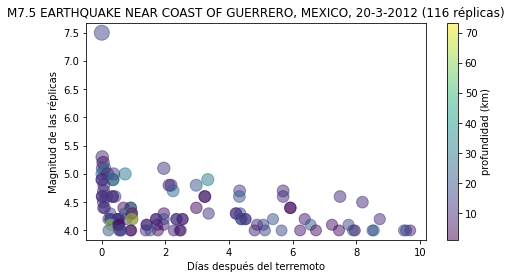

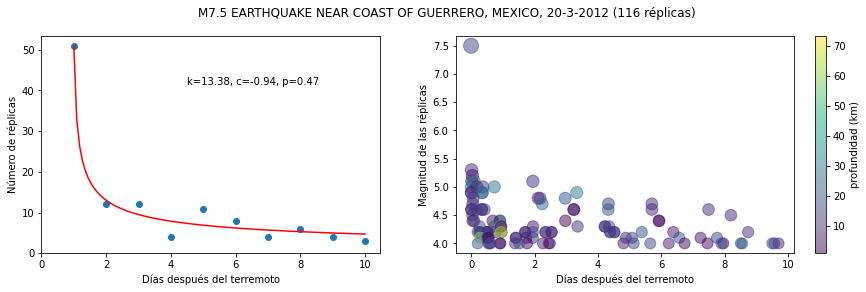

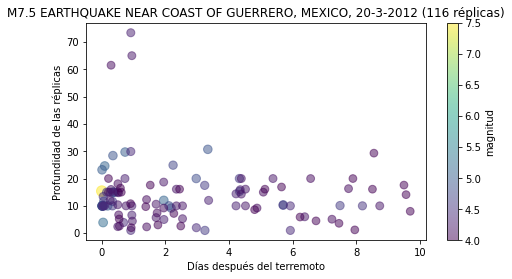

103 NEAR COAST OF CHIAPAS, MEXICO 7 11 2012 7.4


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


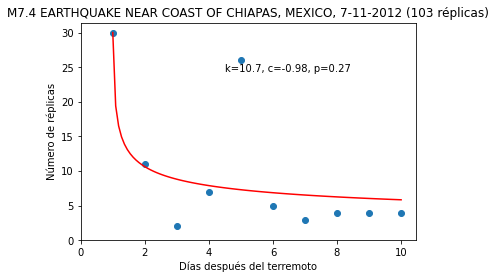

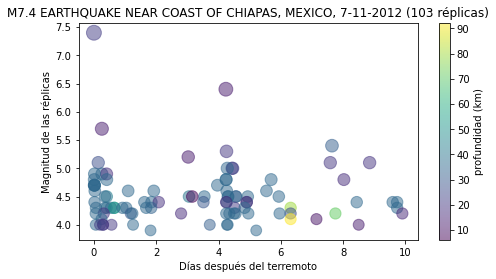

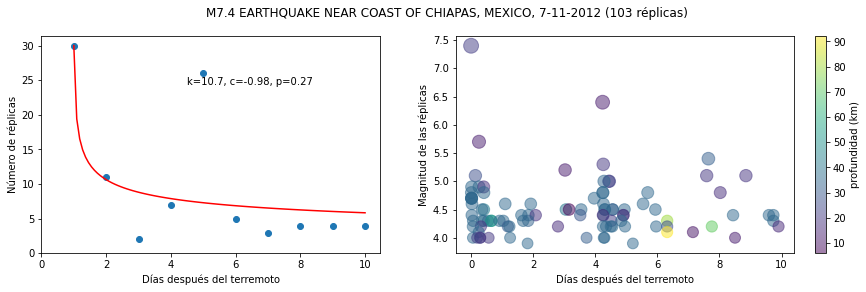

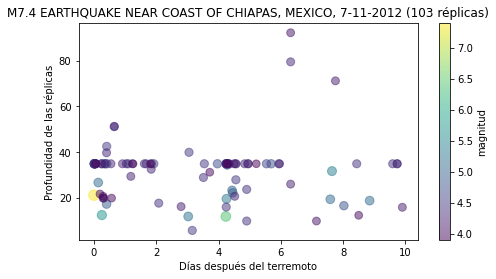

398 NEAR COAST OF NORTHERN CHILE 1 4 2014 8.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


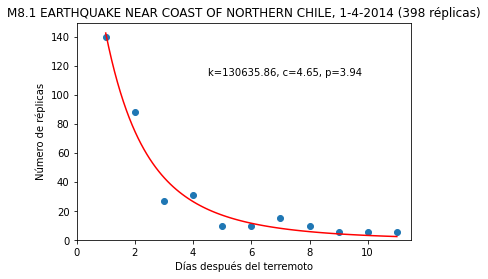

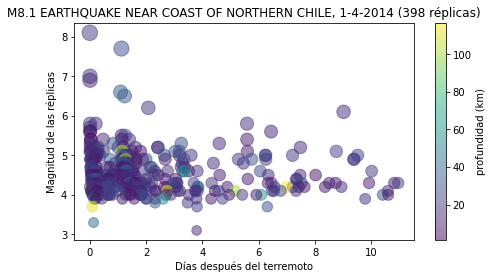

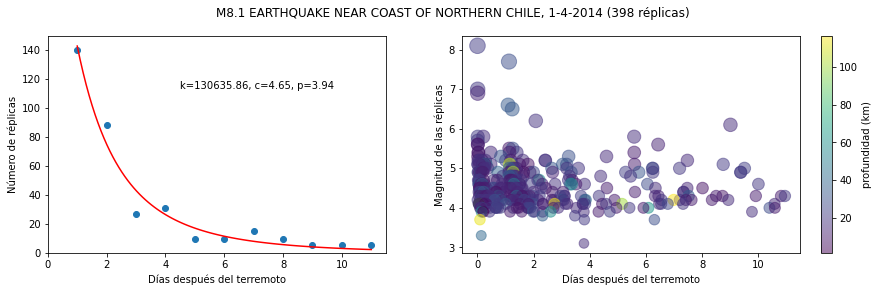

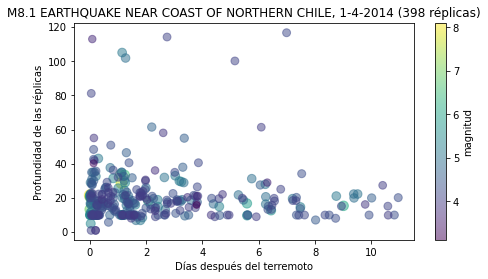

89 NEAR COAST OF ECUADOR 4 8 1998 7.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


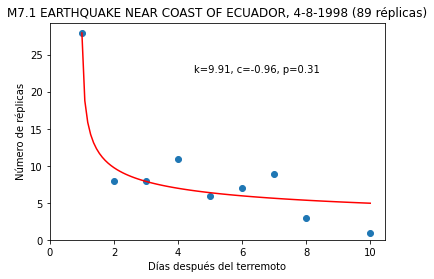

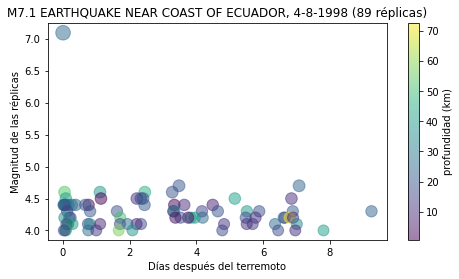

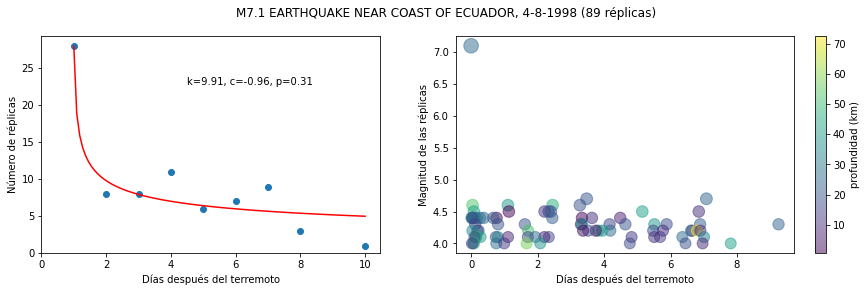

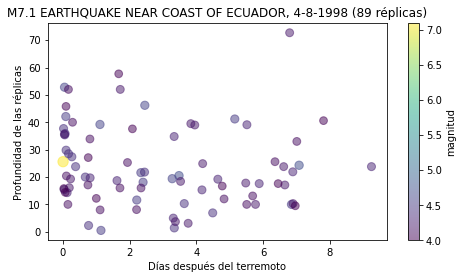

54 NEAR COAST OF OAXACA, MEXICO 25 2 1996 7.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


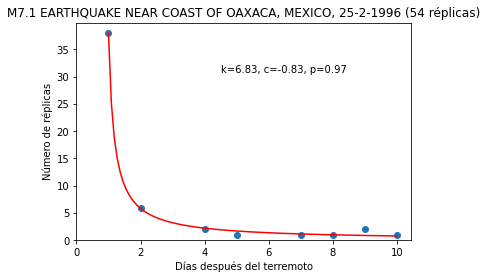

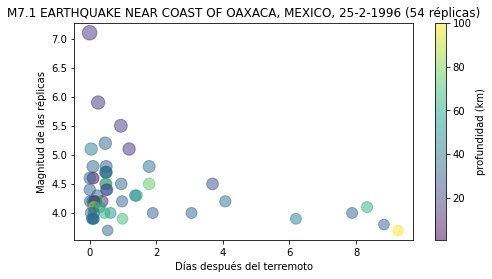

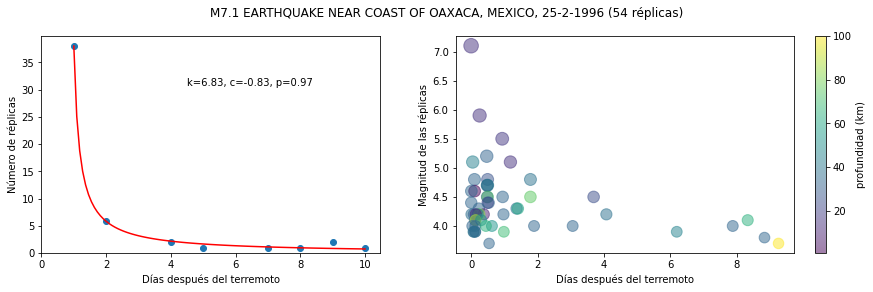

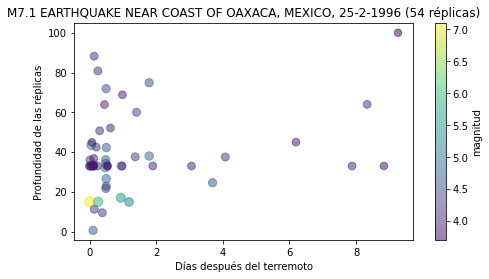

410 NEAR COAST OF NORTHERN CHILE 1 4 2014 8.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


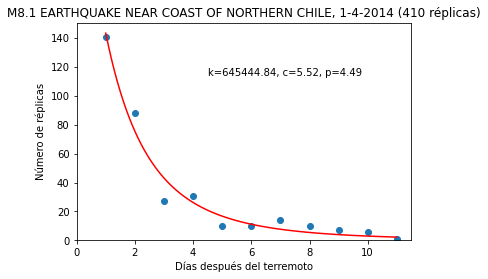

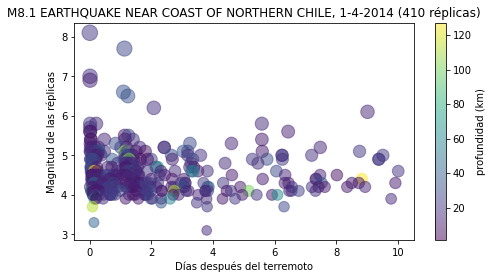

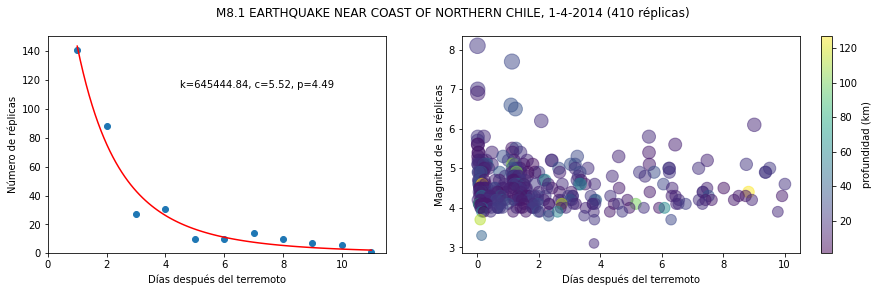

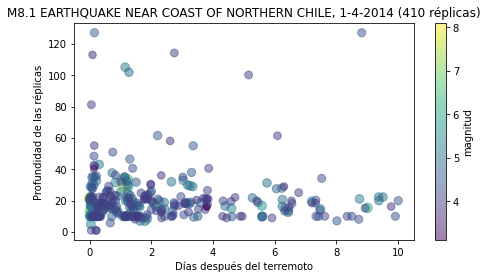

1380 NEAR COAST OF CENTRAL CHILE 11 3 2010 7.0


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


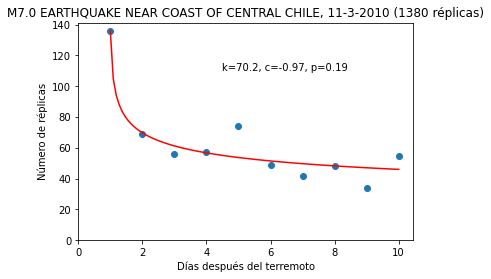

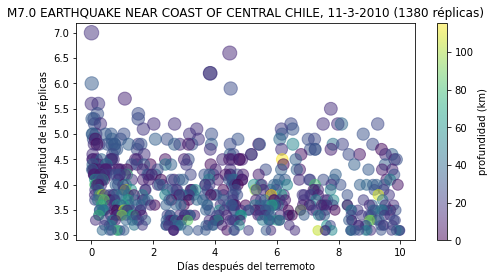

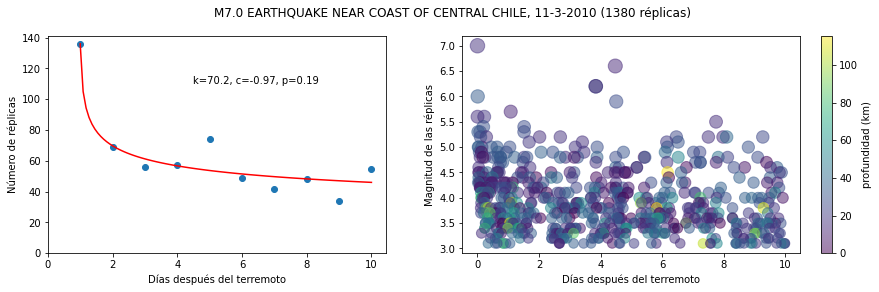

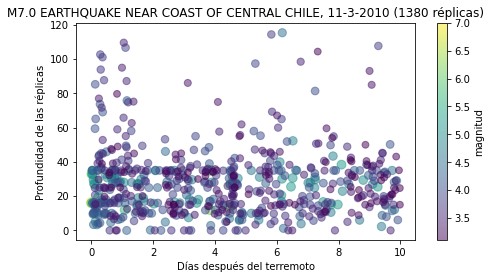

84 NEAR COAST OF PERU 12 11 1996 7.7


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


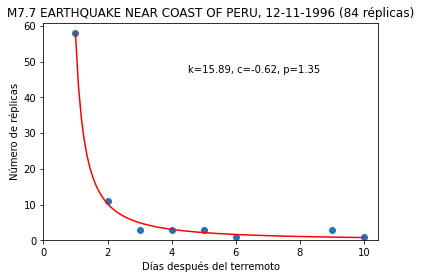

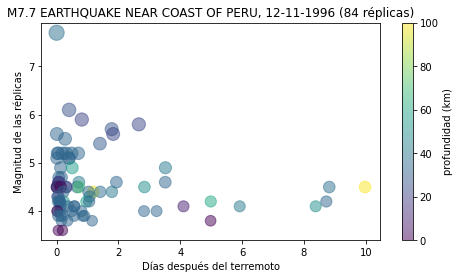

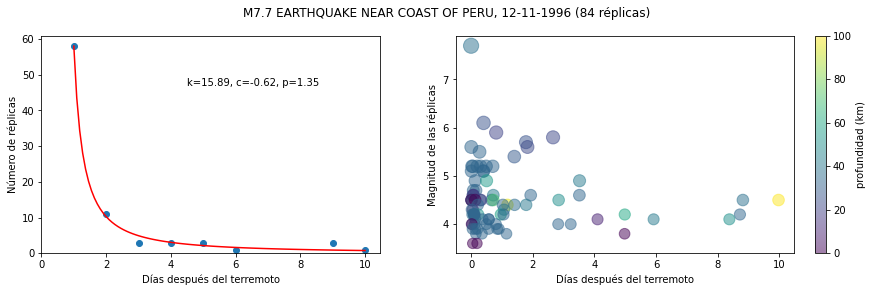

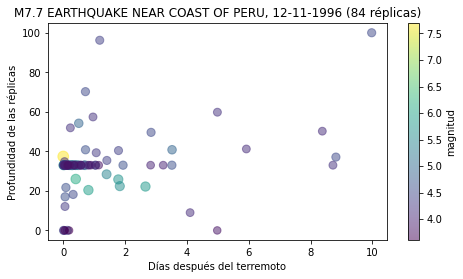

144 NEAR COAST OF CENTRAL CHILE 3 3 1985 7.9


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


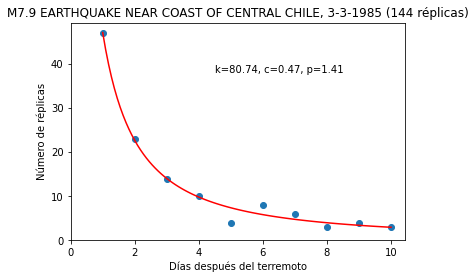

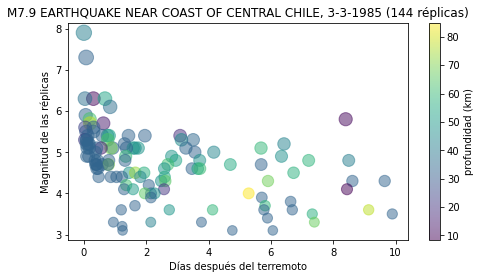

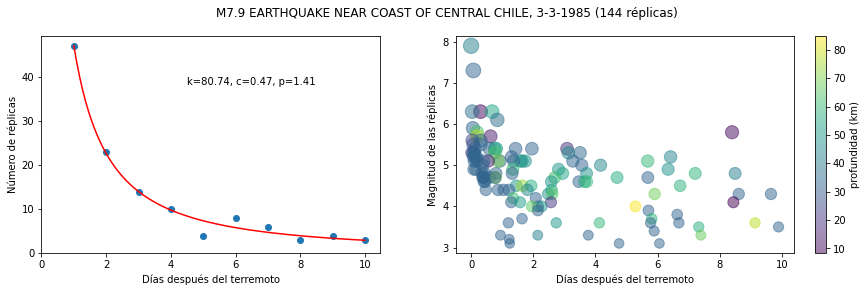

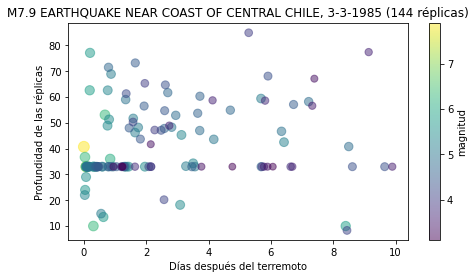

172 OFF COAST OF PERU 15 8 2007 8.0


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


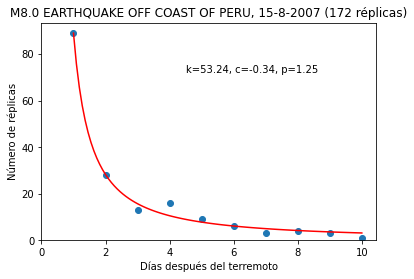

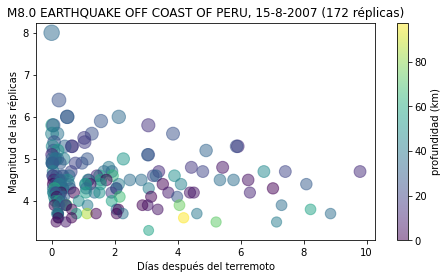

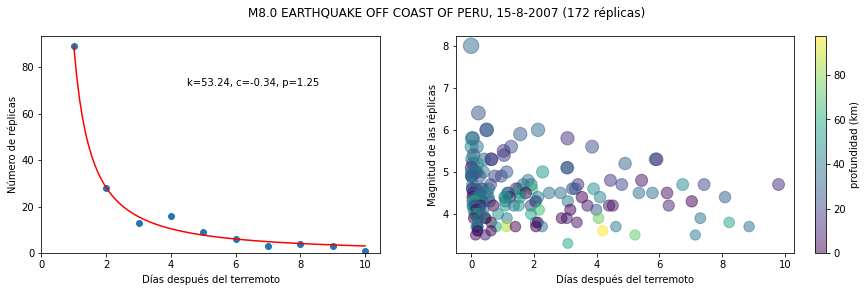

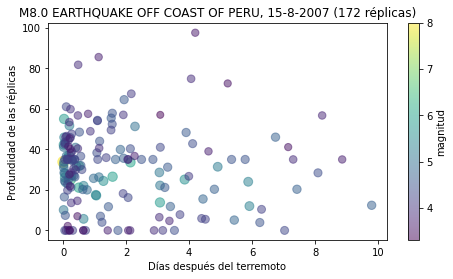

144 NEAR COAST OF CENTRAL CHILE 3 3 1985 7.9


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


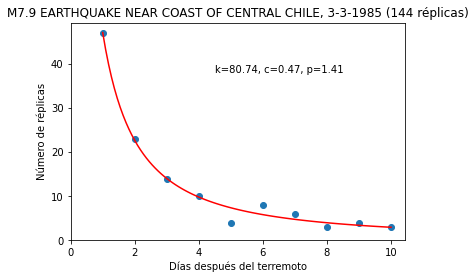

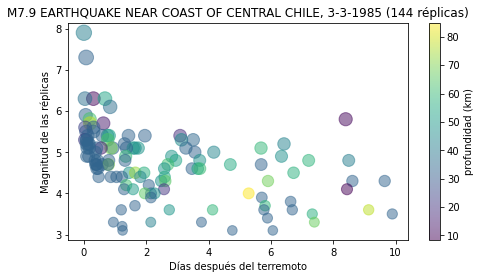

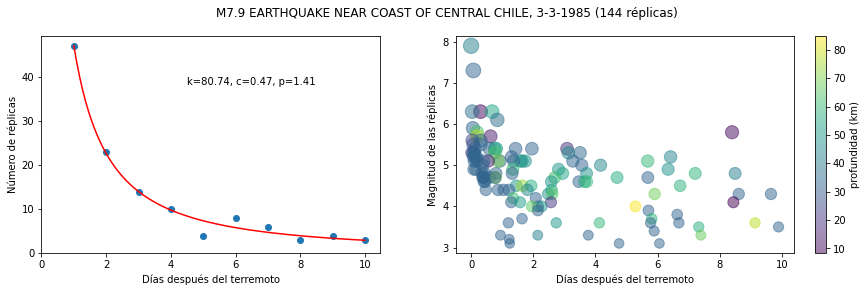

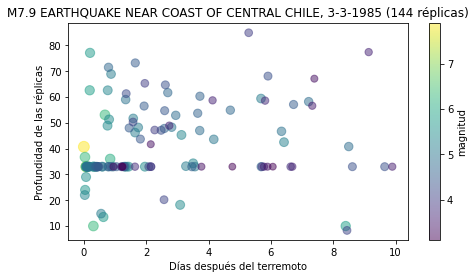

1672 OFF COAST OF CENTRAL CHILE 27 2 2010 8.8


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


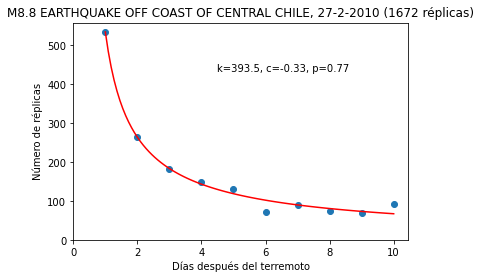

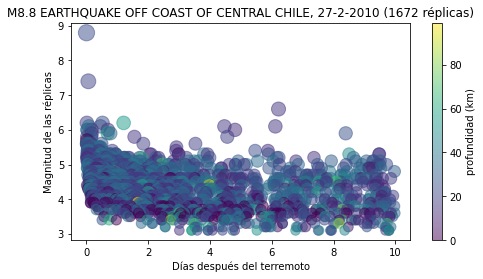

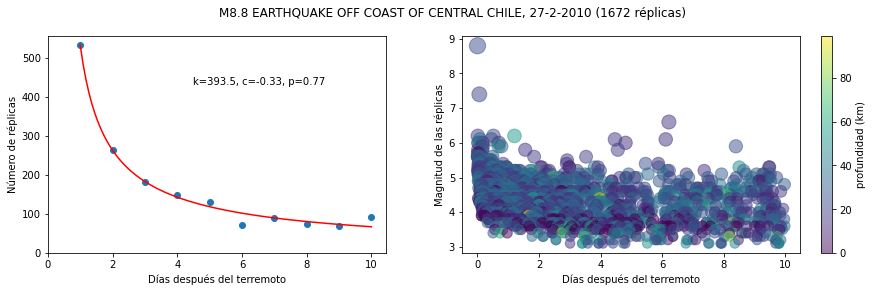

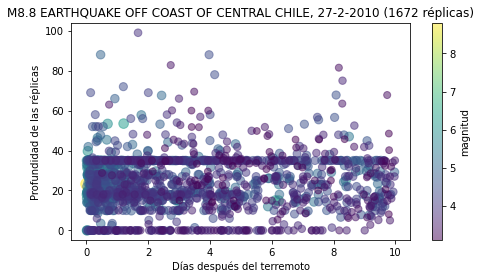

125 NEAR COAST OF CENTRAL CHILE 15 10 1997 7.1


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


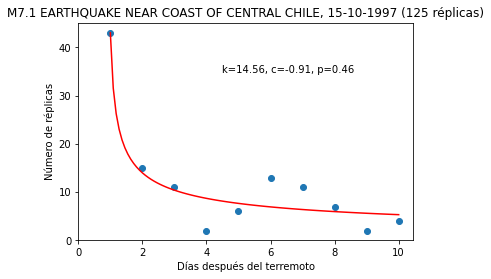

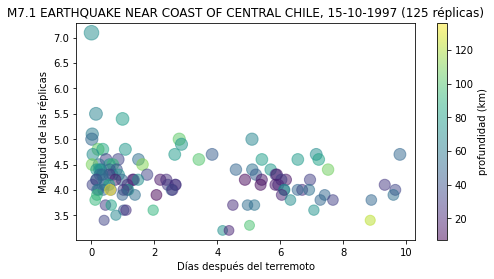

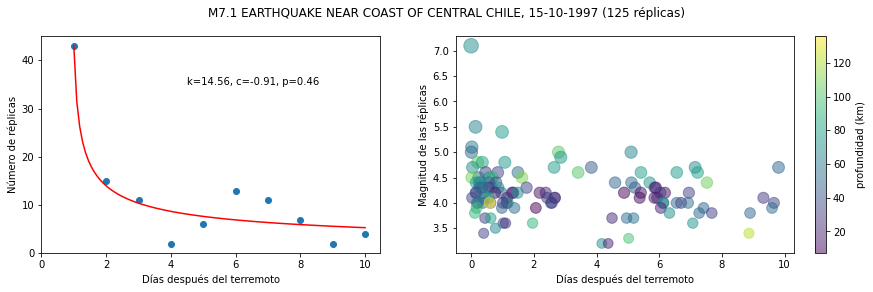

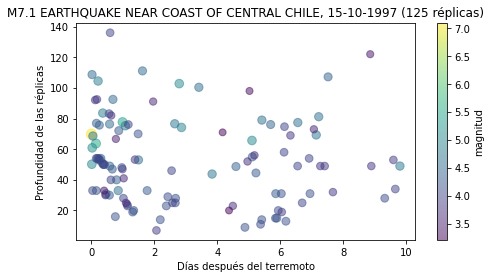

149 OFF COAST OF CENTRAL CHILE 24 4 2017 6.9


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


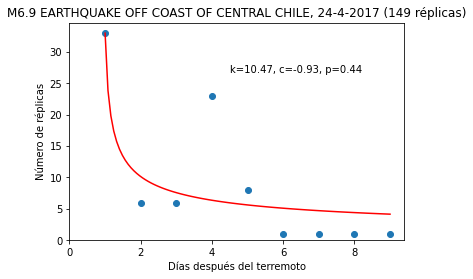

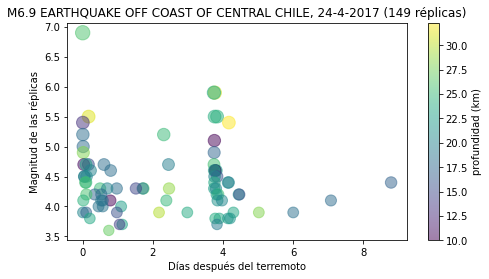

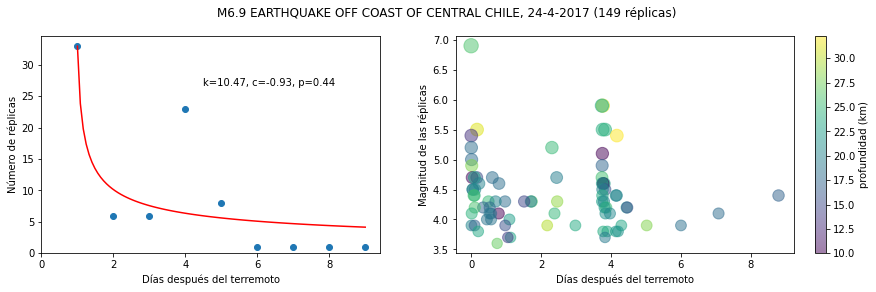

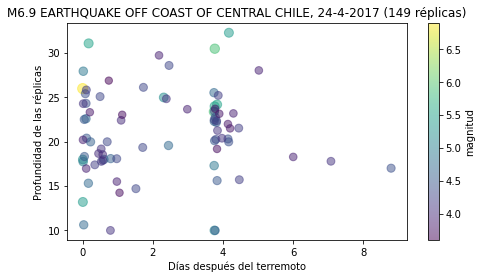

418 NEAR COAST OF PERU 23 6 2001 8.4


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


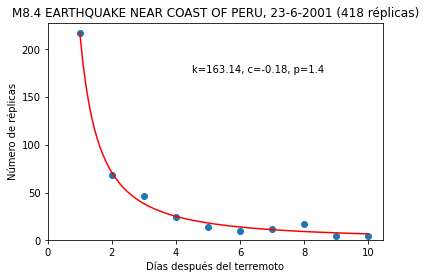

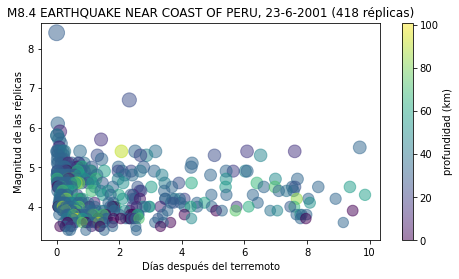

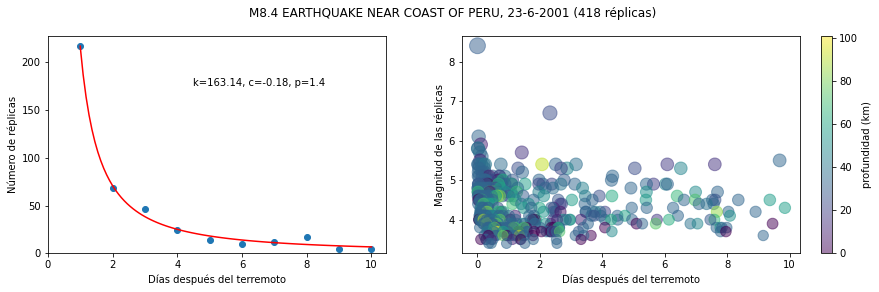

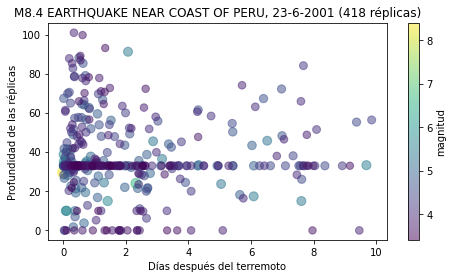

395 NEAR COAST OF NICARAGUA 2 9 1992 7.6


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


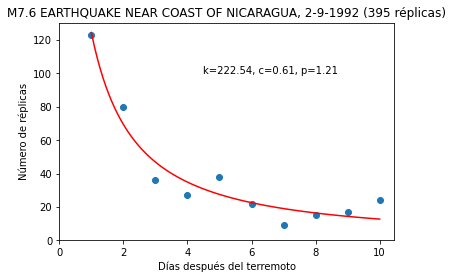

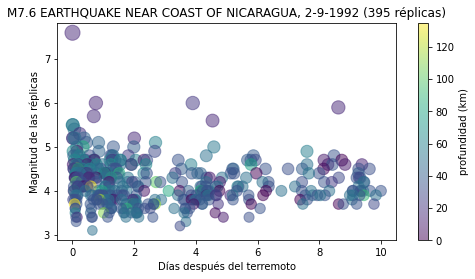

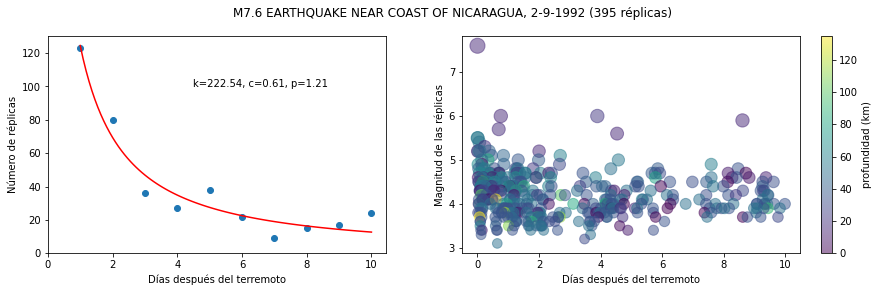

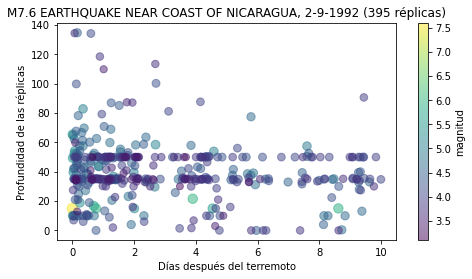

299 OFF COAST OF CENTRAL AMERICA 13 1 2001 7.7


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


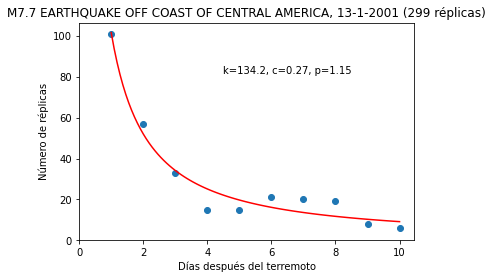

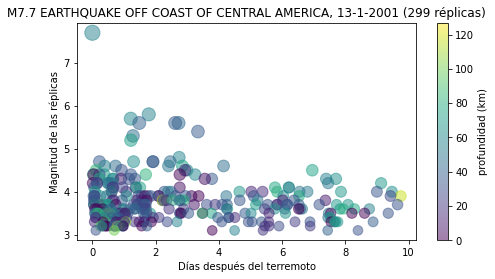

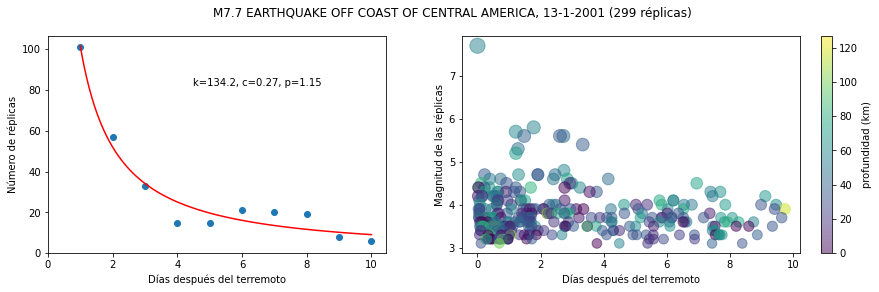

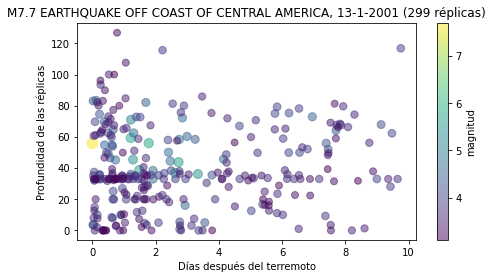

176 NEAR COAST OF NORTHERN CHILE 30 7 1995 8.0


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


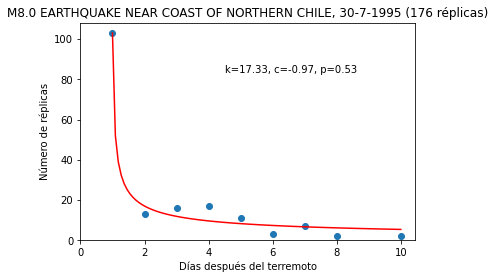

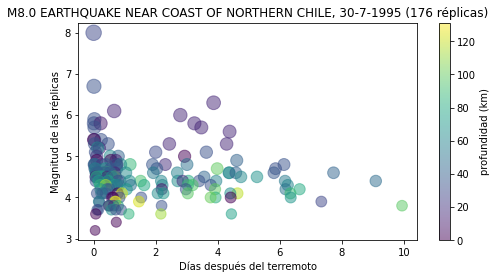

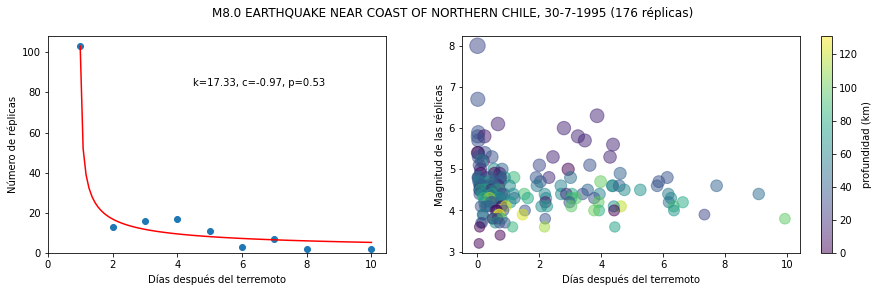

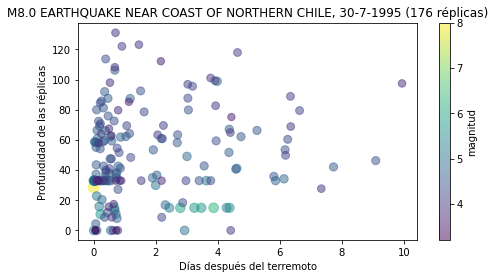

192 NEAR COAST OF CHIAPAS, MEXICO 10 9 1993 7.2


/tmp/ipykernel_1153135/470032982.py:85: RuntimeWarning: invalid value encountered in power
  return k/(c+t)**p


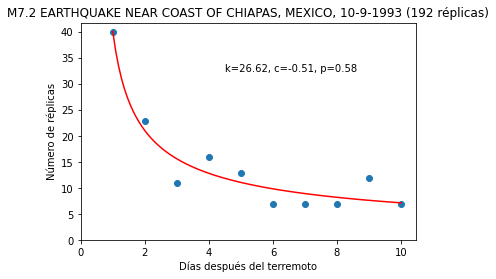

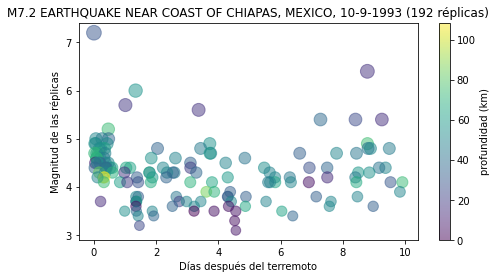

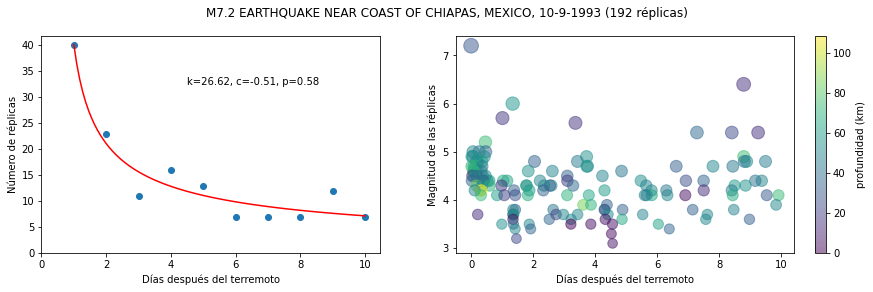

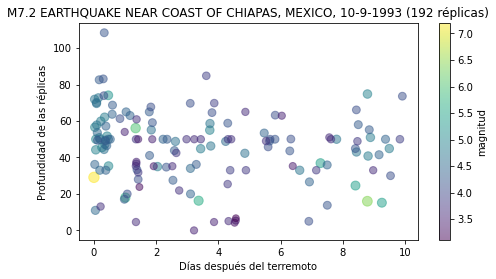

In [179]:
#crear data frame para cada archivo
!rm figs_num_time/*
!rm figs_mag_time/*
!rm figs_depth_time/*
!rm figs_comb/*
for tx_file in list_files:
    ex1='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9762033/1995.10.03.01.51.EventsList.txt'
    ex2='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9754820/2007.11.14.15.40.EventsList.txt'
    ex3='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_11519080/2016.04.16.23.58.EventsList.txt'
    ex4='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9753523/1994.06.09.00.33.EventsList.txt'
    ex5='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9759503/1997.01.23.02.15.EventsList.txt'
    ex6='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9758029/2014.04.18.14.27.EventsList.txt'
    ex7='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9762691/2011.01.01.09.56.EventsList.txt'
    ex8='SPUD_bundle_2023-03-28T14.29.00/Aftershocks_9761373/1998.01.30.12.16.EventsList.txt'
    if (tx_file!=ex1) & (tx_file!=ex2) & (tx_file!=ex3) & (tx_file!=ex4) & (tx_file!=ex5) & (tx_file!=ex6) & (tx_file!=ex7) & (tx_file!=ex8):
        df = pd.read_csv(tx_file[:-4]+"_copy.txt", sep="|", header=None)
        df.columns =['Code', 'Date', 'Latitude', 'Longitude', 'Depth', 'catalog','catalog 2', 'catalog 3','magnitude', 'location']
        df[['fecha', 'tiempo']] = df['Date'].str.split(' ', 1, expand=True)
        df[['anio', 'mes', 'dia']] = df['fecha'].str.split('/', expand=True)
        df[['hora', 'minuto', 'segundo']] = df['tiempo'].str.split(':', expand=True)
        df.sort_values(by=['magnitude'], inplace=True, ascending=False)
        df=df.reset_index(drop=True)
        df['anio'] = df['anio'].astype('int')
        df['mes'] = df['mes'].astype('int')
        df['dia'] = df['dia'].astype('int')
        df['hora'] = df['hora'].astype('int')
        df['minuto'] = df['minuto'].astype('int')
        df['segundo'] = df['segundo'].astype('float64')
        
        #extraer información del mainshock
        main_year=df.loc[0,'anio']
        main_month=df.loc[0,'mes']
        main_day=df.loc[0,'dia']
        main_hour=df.loc[0,'hora']
        main_minute=df.loc[0,'minuto']
        main_sec=df.loc[0,'segundo']
        main_loc=df.loc[0,'location']
        main_mag=df.loc[0,'magnitude']
        d_bis=[0,31,60,91,121,152,182,213,244,274,305,335]
        d_norm=[0,31,59,90,120,151,181,212,243,273,304,334]
        nmes=[1,2,3,4,5,6,7,8,9,10,11,12]
        if (np.mod(main_year,4)==0):
            tyear=(main_year//4-1)*366+(main_year-main_year//4)*365
            tmonth=d_bis[nmes.index(main_month)]
        else:
            tyear=(main_year//4)*366+(main_year-1-main_year//4)*365
            tmonth=d_norm[nmes.index(main_month)]
        #tiempo del mainshock
        t0=main_sec + 60*main_minute + 3600*main_hour + 24*3600*(main_day-1) + tmonth*24*3600 + tyear*24*3600

        #calcular el tiempo de ocurrencia de los aftershocks después del mainshock
        df["t"]=np.nan
        #anio no bisiesto
        for ind in range(12):
            cond=(df['mes'] == nmes[ind]) & (np.mod(df['anio'],4) != 0)
            t_true=df["segundo"] + 60*df["minuto"] + 3600*df["hora"] + 24*3600*(df["dia"]-1) + d_norm[ind]*24*3600+((df.anio//4)*366+(df.anio-df.anio//4-1)*365)*24*3600 - t0
            df["t"]=np.where(cond,t_true,df["t"])
        #anio bisiesto
        for ind in range(12):
            cond=(df['mes'] == nmes[ind]) & (np.mod(df['anio'],4) == 0)
            t_true=df["segundo"] + 60*df["minuto"] + 3600*df["hora"] + 24*3600*(df["dia"]-1) + d_bis[ind]*24*3600+((df.anio//4-1)*366+(df.anio-df.anio//4)*365)*24*3600 - t0
            df['t']=np.where(cond,t_true,df['t'])
            
        #variación del número de aftershocks en el tiempo
        size=df.t.count()-1
        if (size>=50):
            print(size, main_loc, main_day, main_month, main_year, main_mag)
            interv=24*3600 #1 dia
            tmax=df['t'].max()
            bot=0
            n=int(np.ceil(tmax / interv))
            t=[]
            a_shock=[]

            for num in range(1,n+1):
                top=interv*num
                check=df.t[(df.t>bot) & (df.t<=top)].count()
                if check > 0:
                    a_shock.append(df.t[(df.t>bot) & (df.t<=top)].count())
                    t.append(num)
                bot=top
    
            #definición de modelo de Omori para ajustar la curva
            def model_f(t,k,c,p):
                return k/(c+t)**p

            #ajuste de curva
            popt, pcov = curve_fit(model_f, t, a_shock)

            #puntos para el modelo
            k_opt, c_opt, p_opt = popt
            x_model = np.linspace(min(t), max(t), 100)
            y_model = model_f(x_model, k_opt, c_opt, p_opt) 
 
            #gráfica de decaimiento
            plt.plot(t,a_shock,'o')
            plt.plot(x_model, y_model,'r')
            plt.xlim((0))
            plt.ylim((0))
            plt.xlabel("Días después del terremoto")
            plt.ylabel("Número de réplicas")
            title="M"+str(main_mag)+" EARTHQUAKE "+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year))+" ("+str(size)+" réplicas)"
            plt.title(title)
            plt.text(4.5, max(a_shock)-max(a_shock)/5,
                     'k='+str(round(k_opt,2))+', c='+str(round(c_opt,2))+', p='+str(round(p_opt,2)), 
                     horizontalalignment='left',verticalalignment='bottom'
                    )
            plt.savefig('figs_num_time/num_time_'+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year)),bbox_inches='tight')
            plt.show()

        #grafica de magnitud vs tiempo
            plt.figure(figsize=(7.6,4))
            plt.scatter(df.t[(df.t>=0)]/interv,df.magnitude[(df.t>=0)],s=df.magnitude[(df.t>=0)]*30,c=df.Depth[(df.t>=0)],alpha=0.5)
            plt.xlabel("Días después del terremoto")
            plt.ylabel("Magnitud de las réplicas")
            plt.colorbar(label='profundidad (km)')
            plt.title(title)
            plt.savefig('figs_mag_time/mag_time_'+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year)),bbox_inches='tight')
            plt.show()
        
        #grafica combinada
            fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 4),gridspec_kw={'width_ratios': [8,10],'height_ratios':[1]})
            fig.suptitle(title)
            ax1.plot(t,a_shock,'o')
            ax1.plot(x_model, y_model,'r')
            ax1.set_xlim((0))
            ax1.set_ylim((0))
            ax1.set_xlabel("Días después del terremoto")
            ax1.set_ylabel("Número de réplicas")
            ax1.text(4.5, max(a_shock)-max(a_shock)/5,
                     'k='+str(round(k_opt,2))+', c='+str(round(c_opt,2))+', p='+str(round(p_opt,2)), 
                     horizontalalignment='left',verticalalignment='bottom'
                    )
            pcm=ax2.scatter(df.t[(df.t>=0)]/interv,df.magnitude[(df.t>=0)],s=df.magnitude[(df.t>=0)]*30,c=df.Depth[(df.t>=0)],alpha=0.5)
            ax2.set_xlabel("Días después del terremoto")
            ax2.set_ylabel("Magnitud de las réplicas")
            ax=ax2
            fig.colorbar(pcm,ax=ax2,label='profundidad (km)')
            plt.savefig('figs_comb/comb_'+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year)),bbox_inches='tight')
            plt.show()
        #grafica de profundidad vs tiempo
            plt.figure(figsize=(7.6,4))
            plt.scatter(df.t[(df.t>=0)]/interv,df.Depth[(df.t>=0)],s=df.magnitude[(df.t>=0)]*15,c=df.magnitude[(df.t>=0)],alpha=0.5)
            plt.xlabel("Días después del terremoto")
            plt.ylabel("Profundidad de las réplicas")
            plt.colorbar(label='magnitud')
            plt.title("M"+str(main_mag)+" EARTHQUAKE "+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year))+" ("+str(size)+" réplicas)")
            plt.savefig('figs_depth_time/depth_time_'+main_loc+", "+str(int(main_day))+"-"+str(int(main_month))+"-"+str(int(main_year)),bbox_inches='tight')
            plt.show()
    
            

In [178]:
df

Code                      Date  Latitude  Longitude  Depth catalog  \
0    319329  1993/09/10 19:13:02.4000   14.4100   -92.9900   29.1    GCMT   
1    312773  1993/09/03 12:35:05.2000   14.4000   -93.1400   27.4    GCMT   
2    327826  1993/09/19 14:11:02.7000   14.3900   -93.4700   16.0    GCMT   
3    320739  1993/09/12 03:22:39.9000   13.5200   -90.9300   56.1    GCMT   
4    319303  1993/09/10 18:58:53.4000   13.9100   -92.5400   16.0    GCMT   
..      ...                       ...       ...        ...    ...     ...   
188  313124  1993/09/03 21:17:32.6000   13.2400   -90.9260    1.0   CADCG   
189  323893  1993/09/15 07:47:02.3800   14.3322   -90.4043    4.2     ISC   
190  314168  1993/09/05 03:59:53.8000   13.3810   -91.4320   34.3   CADCG   
191  320850  1993/09/12 06:18:30.5700   13.5678   -90.8343   23.8     ISC   
192  323990  1993/09/15 08:44:57.5100   14.2753   -90.3814    6.7     ISC   

    catalog 2      catalog 3  magnitude                       location  \
0        GCMT  GCMT,C091093F        7.2  NEAR COAST OF CHIAPAS, MEXICO   
1        GCMT  GCMT,C090393C        6.7  NEAR COAST OF CHIAPAS, MEXICO   
2        GCMT  GCMT,C091993F        6.4  NEAR COAST OF CHIAPAS, MEXICO   
3        GCMT  GCMT,B091293B        6.0        NEAR COAST OF GUATEMALA   
4        GCMT  GCMT,B091093E        6.0   OFF COAST OF CHIAPAS, MEXICO   
..        ...            ...        ...                            ...   
188       ISC     ISC,205970        3.3        NEAR COAST OF GUATEMALA   
189       ISC     ISC,208069        3.3                      GUATEMALA   
190       ISC     ISC,206170        3.2        NEAR COAST OF GUATEMALA   
191       ISC     ISC,207485        3.2        NEAR COAST OF GUATEMALA   
192       ISC     ISC,208086        3.1                      GUATEMALA   

          fecha         tiempo  anio  mes  dia  hora  minuto  segundo  \
0    1993/09/10  19:13:02.4000  1993    9   10    19      13     2.40   
1    1993/09/03  12:35:05.2000  1993    9    3    12      35     5.20   
2    1993/09/19  14:11:02.7000  1993    9   19    14      11     2.70   
3    1993/09/12  03:22:39.9000  1993    9   12     3      22    39.90   
4    1993/09/10  18:58:53.4000  1993    9   10    18      58    53.40   
..          ...            ...   ...  ...  ...   ...     ...      ...   
188  1993/09/03  21:17:32.6000  1993    9    3    21      17    32.60   
189  1993/09/15  07:47:02.3800  1993    9   15     7      47     2.38   
190  1993/09/05  03:59:53.8000  1993    9    5     3      59    53.80   
191  1993/09/12  06:18:30.5700  1993    9   12     6      18    30.57   
192  1993/09/15  08:44:57.5100  1993    9   15     8      44    57.51   

                 t  
0         0.000000  
1   -628677.200005  
2    759480.299995  
3    115777.500000  
4      -849.000000  
..             ...  
188 -597329.800003  
189  390839.979996  
190 -486788.599998  
191  126328.169998  
192  394315.110001  

[193 rows x 19 columns]

In [ ]:
#df.loc[(df.t>0.) & (df.t<interv)].t.count()

In [115]:
#encontrar archivo de texto con los aftershocks
#for file in os.listdir("SPUD_bundle_2023-03-28T14.29.00/Aftershocks_14211086"):
#    if fnmatch.fnmatch(file, '*.txt'):
#        print(file)
#        tx_file=file
        
#type(tx_file)


In [150]:
#list_files=[]

#for file in os.listdir("SPUD_bundle_2023-03-28T14.29.00"):
#    for i in os.listdir("SPUD_bundle_2023-03-28T14.29.00"+"/"+file):
#        if fnmatch.fnmatch(i, '*.txt'):
            #print(i)
     #   tx_file=file
#            list_files.append("SPUD_bundle_2023-03-28T14.29.00"+"/"+file+"/"+i)